In [26]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [27]:
import tensorflow as tf
from tensorflow.keras import models,layers,Sequential
import matplotlib.pyplot as plt

In [28]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 4500 files belonging to 3 classes.


In [29]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [30]:
len(dataset)

141

In [31]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 2 1 1 0 2 1 1 0 1 1 2 0 1 2 0 2 1 1 2 2 0 1 1 1 0 2 2 2 0 1]


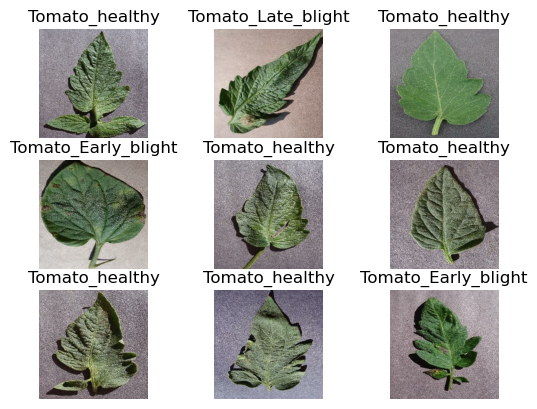

In [32]:
for image_batch,label_batch in dataset.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [33]:
train_size=0.8

In [34]:
len(dataset)*train_size

112.80000000000001

In [35]:
train_ds=dataset.take(112)


In [36]:
test_ds=dataset.skip(112)
len(test_ds)

29

In [37]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [38]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [39]:
test_ds=test_ds.skip(14)
len(test_ds)

15

In [40]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=9)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [41]:
train_ds ,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [42]:
len(train_ds)

112

In [43]:
len(val_ds)

14

In [44]:
len(test_ds)

15

In [45]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [46]:
resize_and_rescale=Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [47]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [48]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

In [49]:
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

c:\Users\MirzaSafiullaBaig\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,387 (501.51 KB)

 Trainable params: 128,387 (501.51 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [54]:
history=model.fit(
    train_ds,
    epochs=30,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 75s 611ms/step - accuracy: 0.4246 - loss: 1.0220 - val_accuracy: 0.6384 - val_loss: 0.8725
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 577ms/step - accuracy: 0.7495 - loss: 0.5723 - val_accuracy: 0.7991 - val_loss: 0.4702
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 577ms/step - accuracy: 0.8533 - loss: 0.3551 - val_accuracy: 0.8147 - val_loss: 0.4164
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 579ms/step - accuracy: 0.8550 - loss: 0.3590 - val_accuracy: 0.8080 - val_loss: 0.4368
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 577ms/step - accuracy: 0.8779 - loss: 0.3043 - val_accuracy: 0.8415 - val_loss: 0.3788
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 576ms/step - accuracy: 0.8527 - loss: 0.3645 - val_accuracy: 0.8192 - val_loss: 0.4520
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 577ms/step - accuracy: 0.8566 - loss: 0.3634 - val_accuracy: 0.7991 - val_loss: 0.4883
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 65s 579ms/step - accuracy: 0.8845 - loss: 0

In [55]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 112}

In [56]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [57]:
history.history['accuracy']

[0.5291153192520142,
 0.7746360301971436,
 0.8440649509429932,
 0.849664032459259,
 0.8798992037773132,
 0.7774356007575989,
 0.8737401962280273,
 0.8908174633979797,
 0.9081746935844421,
 0.913493812084198,
 0.9171332716941833,
 0.9305710792541504,
 0.9381299018859863,
 0.9434490203857422,
 0.9291713237762451,
 0.9437289834022522,
 0.9423292279243469,
 0.9381299018859863,
 0.9496080875396729,
 0.9476484060287476,
 0.9482082724571228,
 0.9540873169898987,
 0.9524075984954834,
 0.9549272060394287,
 0.9669652581214905,
 0.9666853547096252,
 0.9675251841545105,
 0.9588465690612793,
 0.957166850566864,
 0.9706047177314758]

In [58]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

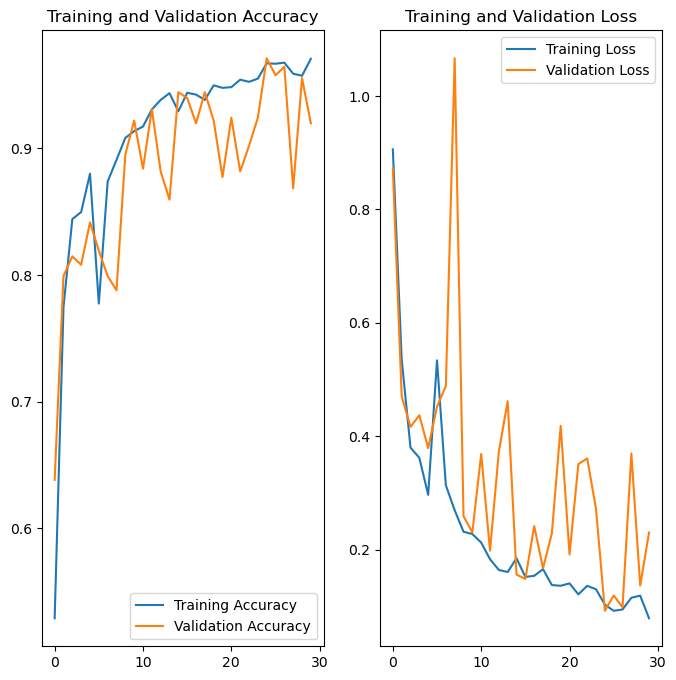

In [59]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
predicted label: Tomato_Late_blight


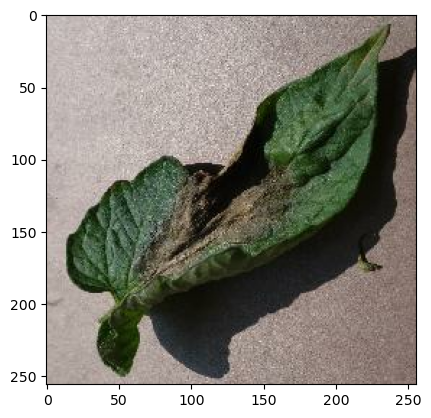

In [98]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [61]:
model.save('my_model.keras')